In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [22]:
os.makedirs("csv_files",exist_ok=True)
os.makedirs("outputs",exist_ok=True)

In [23]:
sentiment_url = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
trader_url = "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
sentiment_df = pd.read_csv(sentiment_url)
trader_df = pd.read_csv(trader_url)

In [24]:
sentiment_df.to_csv("csv_files/sentiment_data_raw.csv", index=False)
trader_df.to_csv("csv_files/trader_data_raw.csv", index=False)

In [25]:
print("Sentiment Data Columns:", sentiment_df.columns)

Sentiment Data Columns: Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [26]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True)
trader_df['date'] = trader_df['Timestamp IST'].dt.date


In [27]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
sentiment_df['Sentiment'] = sentiment_df['classification'].map({'Fear': 0, 'Greed': 1})


In [28]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'Sentiment']], on='date', how='inner')
merged_df.to_csv("csv_files/merged_data.csv", index=False)

In [30]:
print("Columns in merged_df:", merged_df.columns.tolist())


Columns in merged_df: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date', 'Sentiment']


In [31]:
print("Sample Merged Data:")
print(merged_df[['Account', 'Coin', 'Size USD', 'Side', 'Closed PnL', 'Sentiment']].head())

Sample Merged Data:
                                      Account  Coin  Size USD Side  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107   7872.16  BUY   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107    127.68  BUY   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107   1150.63  BUY   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107   1142.04  BUY   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107     69.75  BUY   

   Closed PnL  Sentiment  
0         0.0        NaN  
1         0.0        NaN  
2         0.0        NaN  
3         0.0        NaN  
4         0.0        NaN  


In [32]:
sns.set(style="whitegrid")

In [35]:
merged_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'Sentiment'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


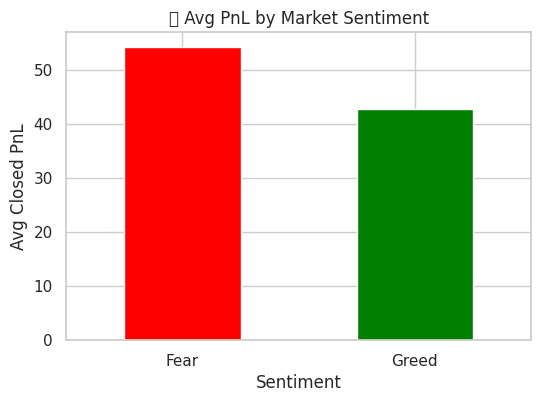

In [36]:
plt.figure(figsize=(6,4))
merged_df.groupby('Sentiment')['Closed PnL'].mean().plot(kind='bar', color=['red', 'green'])
plt.xticks([0,1], ['Fear', 'Greed'], rotation=0)
plt.ylabel("Avg Closed PnL")
plt.title("Avg PnL by Market Sentiment")
plt.show()

/tmp/ipython-input-38-2546521112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Sentiment', y='Size USD', palette='Set2')


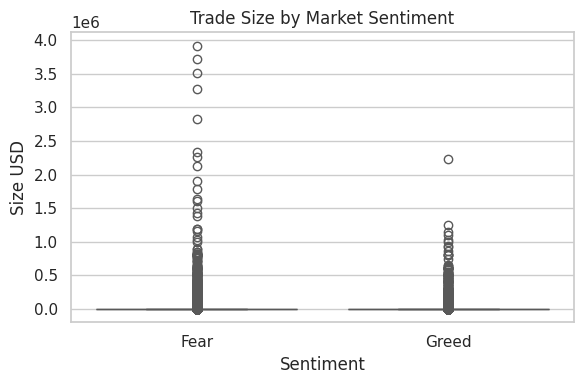

In [38]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=merged_df, x='Sentiment', y='Size USD', palette='Set2')
plt.xticks([0, 1], ['Fear', 'Greed'])
plt.title("Trade Size by Market Sentiment")
plt.tight_layout()
plt.show()


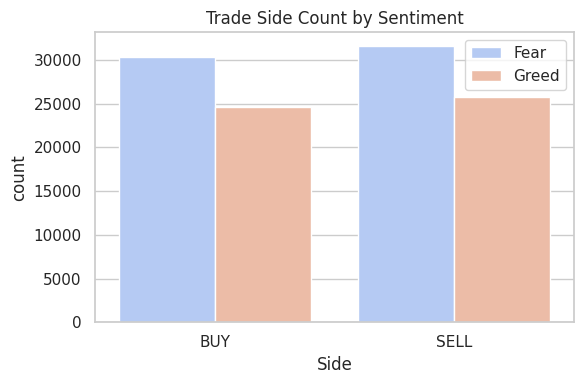

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(data=merged_df, x='Side', hue='Sentiment', palette='coolwarm')
plt.title("Trade Side Count by Sentiment")
plt.legend(labels=["Fear", "Greed"])
plt.tight_layout()
plt.savefig("outputs/trade_side_by_sentiment.png")
plt.show()

/tmp/ipython-input-40-1777130335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Sentiment', y='Size USD', palette='pastel')


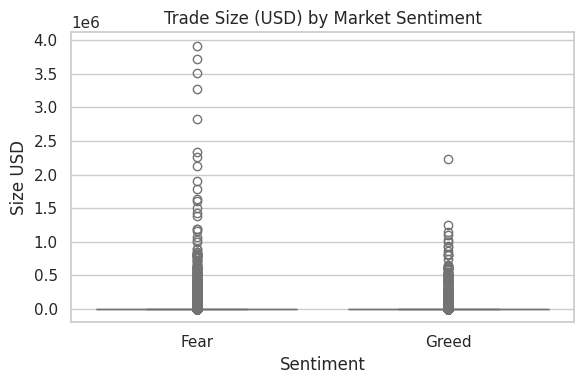

In [40]:
plt.figure(figsize=(6,4))
sns.boxplot(data=merged_df, x='Sentiment', y='Size USD', palette='pastel')
plt.xticks([0,1], ['Fear', 'Greed'])
plt.title("Trade Size (USD) by Market Sentiment")
plt.tight_layout()
plt.savefig("outputs/trade_size_by_sentiment.png")
plt.show()
